<a href="https://colab.research.google.com/github/uol-mediaprocessing/group-projects-sudoku-solver/blob/master/main_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preamble

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install import_ipynb
import import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2975 sha256=1c9e1445f7f2125e36eb9f112b8f6f78e31c77354d99e19f8783c23bed3e10d4
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [3]:
!wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-sudoku-solver/master/defs_common.ipynb -O "defs_common.ipynb"
from defs_common import *

--2020-01-02 18:33:20--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-sudoku-solver/master/defs_common.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5602 (5.5K) [text/plain]
Saving to: ‘defs_common.ipynb’

defs_common.ipynb   100%[===================>]   5.47K  --.-KB/s    in 0s      

2020-01-02 18:33:20 (112 MB/s) - ‘defs_common.ipynb’ saved [5602/5602]

importing Jupyter notebook from defs_common.ipynb


In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

In [5]:
!cp "./drive/My Drive/sudoku_extraction_output.bz2" "./sudoku_extraction_output.bz2"
images = pd.read_pickle("./sudoku_extraction_output.bz2")
images

,filename,row,col,image,digit
0,v2_train/image1077.jpg,0,0,"[[[79, 75, 70], [80, 75, 71], [89, 83, 79], [9...",0
1,v2_train/image1077.jpg,0,1,"[[[111, 109, 103], [108, 106, 101], [112, 110,...",7
2,v2_train/image1077.jpg,0,2,"[[[166, 163, 158], [170, 167, 161], [174, 170,...",1
3,v2_train/image1077.jpg,0,3,"[[[187, 183, 180], [190, 186, 183], [184, 180,...",0
4,v2_train/image1077.jpg,0,4,"[[[190, 186, 181], [190, 187, 182], [188, 184,...",0
...,...,...,...,...,...
12388,./dataset/000000701/IMG_8772.JPG,8,4,"[[[90, 89, 90], [103, 101, 102], [113, 111, 11...",0
12389,./dataset/000000701/IMG_8772.JPG,8,5,"[[[106, 103, 105], [111, 109, 110], [112, 110,...",0
12390,./dataset/000000701/IMG_8772.JPG,8,6,"[[[98, 98, 100], [110, 110, 110], [111, 111, 1...",0
12391,./dataset/000000701/IMG_8772.JPG,8,7,"[[[100, 99, 99], [112, 110, 111], [114, 112, 1...",0


# Introduction

# Splitting dataset into train and test subsets

In [0]:
train, test = train_test_split(images, test_size=0.25)

In [35]:
train

,index,filename,row,col,image,digit
0,1090,v2_train/image1048.jpg,4,1,"[[[84, 82, 84], [57, 53, 55], [86, 83, 83], [9...",3
1,7321,./dataset/023004000/IMG_8764.JPG,3,4,"[[[53, 52, 56], [53, 52, 56], [58, 56, 60], [5...",0
2,7011,./dataset/023004000/IMG_8765.JPG,5,0,"[[[158, 154, 155], [134, 130, 132], [42, 39, 4...",9
3,297,v2_train/image1050.jpg,6,0,"[[[150, 146, 147], [92, 83, 83], [74, 61, 57],...",0
4,8641,./dataset/003092000/IMG_8788.JPG,6,1,"[[[49, 51, 50], [47, 49, 48], [41, 43, 42], [3...",0
...,...,...,...,...,...,...
9289,8559,./dataset/003092000/IMG_8799.JPG,6,0,"[[[46, 47, 52], [48, 49, 54], [61, 62, 67], [1...",0
9290,1211,v2_train/image1011.jpg,8,5,"[[[183, 172, 157], [184, 172, 158], [184, 173,...",0
9291,1528,v2_train/image1045.jpg,7,7,"[[[171, 173, 172], [169, 171, 170], [171, 173,...",0
9292,2704,./dataset/234598176/19-12-12 12-50-57 8950.jpg,3,4,"[[[66, 64, 60], [75, 73, 69], [81, 79, 75], [8...",1


In [36]:
test

,index,filename,row,col,image,digit
0,1095,v2_train/image1048.jpg,4,6,"[[[70, 68, 70], [87, 85, 88], [97, 91, 96], [9...",0
1,9772,./dataset/900700004/IMG_8841.JPG,5,7,"[[[129, 124, 125], [158, 152, 154], [123, 116,...",0
2,3194,./dataset/234598176/19-12-12 12-51-02 8952.jpg,3,8,"[[[130, 134, 143], [135, 139, 149], [153, 157,...",3
3,7021,./dataset/023004000/IMG_8765.JPG,6,1,"[[[88, 85, 86], [77, 76, 76], [81, 79, 80], [8...",0
4,3365,./dataset/234598176/IMG_8883.JPG,4,8,"[[[136, 136, 136], [173, 173, 173], [166, 166,...",1
...,...,...,...,...,...,...
3094,7237,./dataset/023004000/IMG_8762.JPG,3,1,"[[[47, 45, 50], [44, 42, 48], [46, 44, 50], [4...",8
3095,1577,v2_train/image203.jpg,4,2,"[[[73, 78, 48], [80, 85, 54], [92, 97, 65], [1...",0
3096,10312,./dataset/900700004/IMG_8834.JPG,2,7,"[[[140, 140, 144], [154, 153, 158], [164, 163,...",1
3097,9014,./dataset/009000800/IMG_8806.JPG,2,5,"[[[199, 200, 204], [200, 201, 205], [200, 201,...",2


# Recognize digits using neural networks

## Plain MNIST

### Acquire dataset

In [6]:
from keras.datasets import mnist
(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [7]:
print("Train:", mnist_x_train.shape, mnist_y_train.shape)
print("Test:", mnist_x_test.shape, mnist_y_test.shape)

Train: (60000, 28, 28) (60000,)
Test: (10000, 28, 28) (10000,)


In [0]:
mnist_x_train = mnist_x_train.astype("float32") / 255.0
mnist_x_test = mnist_x_test.astype("float32") / 255.0

In [0]:
mnist_x_train = mnist_x_train.reshape(-1, 28, 28, 1)
mnist_x_test = mnist_x_test.reshape(-1, 28, 28, 1)

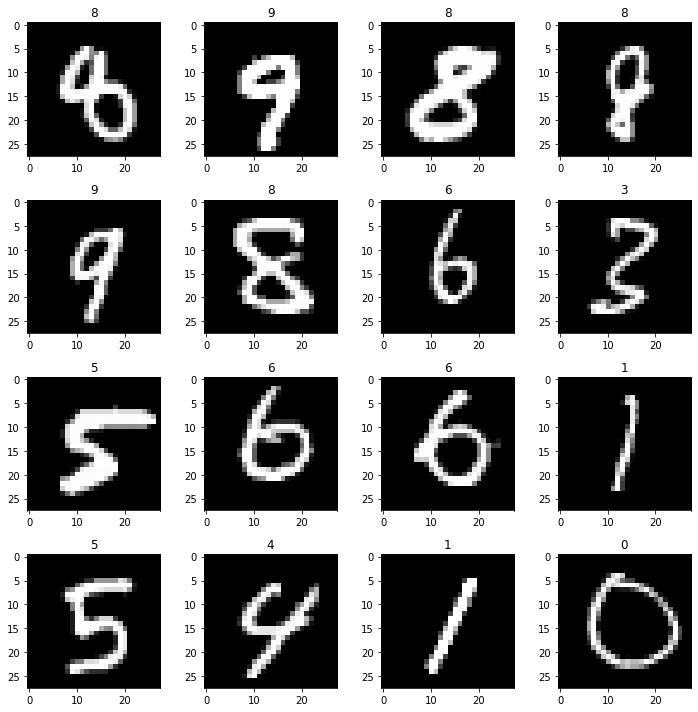

In [10]:
show_images(mnist_x_train, mnist_y_train, cmap="gray", scaling=(2.5, 2.5), n_samples=16)

### Building the model

In [11]:
from keras import models, layers

plainmnist_model = model_input = layers.Input(shape=(28, 28, 1))

plainmnist_model = layers.Conv2D(16, 3, activation="relu")(plainmnist_model)
plainmnist_model = layers.BatchNormalization()(plainmnist_model)
plainmnist_model = layers.Conv2D(32, 3, activation="relu")(plainmnist_model)
plainmnist_model = layers.MaxPool2D()(plainmnist_model)
plainmnist_model = layers.BatchNormalization()(plainmnist_model)
plainmnist_model = layers.Dropout(0.25)(plainmnist_model)

plainmnist_model = layers.Conv2D(64, 3, activation="relu")(plainmnist_model)
plainmnist_model = layers.BatchNormalization()(plainmnist_model)
plainmnist_model = layers.Conv2D(128, 3, activation="relu")(plainmnist_model)
plainmnist_model = layers.GlobalMaxPool2D()(plainmnist_model)
plainmnist_model = layers.BatchNormalization()(plainmnist_model)
plainmnist_model = layers.Dropout(0.25)(plainmnist_model)

#model = layers.Flatten()(model)
#model = layers.Dense(32, activation="relu")(model)
#model = layers.BatchNormalization()(model)
plainmnist_model = layers.Dense(10, activation="softmax")(plainmnist_model)
plainmnist_model = models.Model(model_input, plainmnist_model)
plainmnist_model.compile("adam", "sparse_categorical_crossentropy", metrics=["acc"])
plainmnist_model.summary()













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 32)        128    

### Fitting the model

In [12]:
from keras import callbacks
early_stopping = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
fit_history = plainmnist_model.fit(mnist_x_train, mnist_y_train, validation_data=(mnist_x_test, mnist_y_test), epochs=100, callbacks=[early_stopping])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 24s 395us/step - loss: 0.1857 - acc: 0.9440 - val_loss: 0.0437 - val_acc: 0.9869
Epoch 2/100
60000/60000 [==============================] - 17s 280us/step - loss: 0.0660 - acc: 0.9805 - val_loss: 0.0317 - val_acc: 0.9898
Epoch 3/100
60000/60000 [==============================] - 17s 277us/step - loss: 0.0543 - acc: 0.9833 - val_loss: 0.0291 - val_acc: 0.9908
Epoch 4/100
60000/60000 [==============================] - 17s 282us/step - loss: 0.0465 - acc: 0.9857 - val_loss: 0.0312 - val_acc: 0.9903
Epoch 5/100
60000/60000 [==============================] - 17s 279us/step - loss: 0.0410 - acc: 0.9868 - val_loss: 0.0231 - val_acc: 0.9919
Epoch 6/100
60000/60000 [==============================] - 16s 275us/step - loss: 0.0346 - acc: 0.9887 - val_loss: 0.0205 - val_acc: 0.9925
Epoch 7/100
60

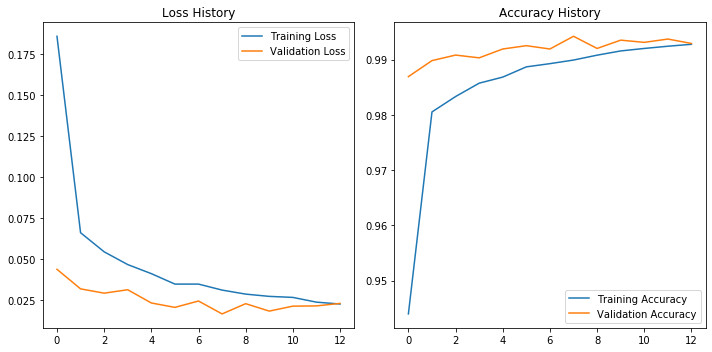

In [22]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Loss History")
plt.plot(fit_history.history["loss"], label="Training Loss")
plt.plot(fit_history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.title("Accuracy History")
plt.plot(fit_history.history["acc"], label="Training Accuracy")
plt.plot(fit_history.history["val_acc"], label="Validation Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
plainmnist_model.evaluate(mnist_x_test, mnist_y_test)

10000/10000 [==============================] - 1s 60us/step


[0.016469674529390615, 0.9942]

### Visualizing the model

Visualizing test image 2877


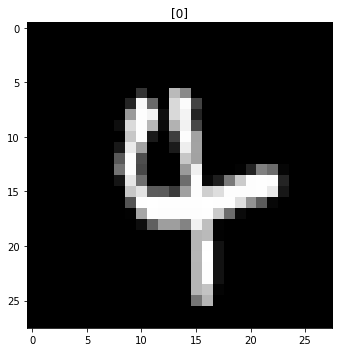

Visualizing layer #1 (conv2d_1)


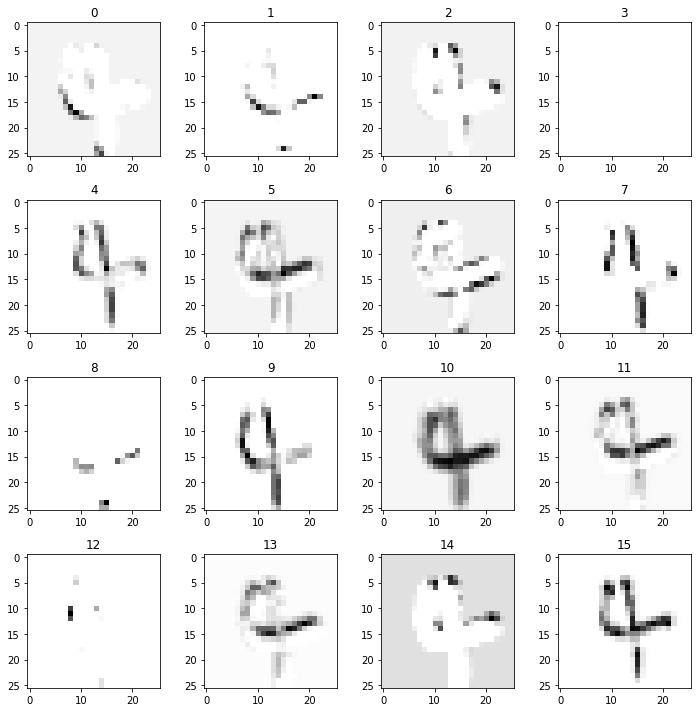

Visualizing layer #3 (conv2d_2)


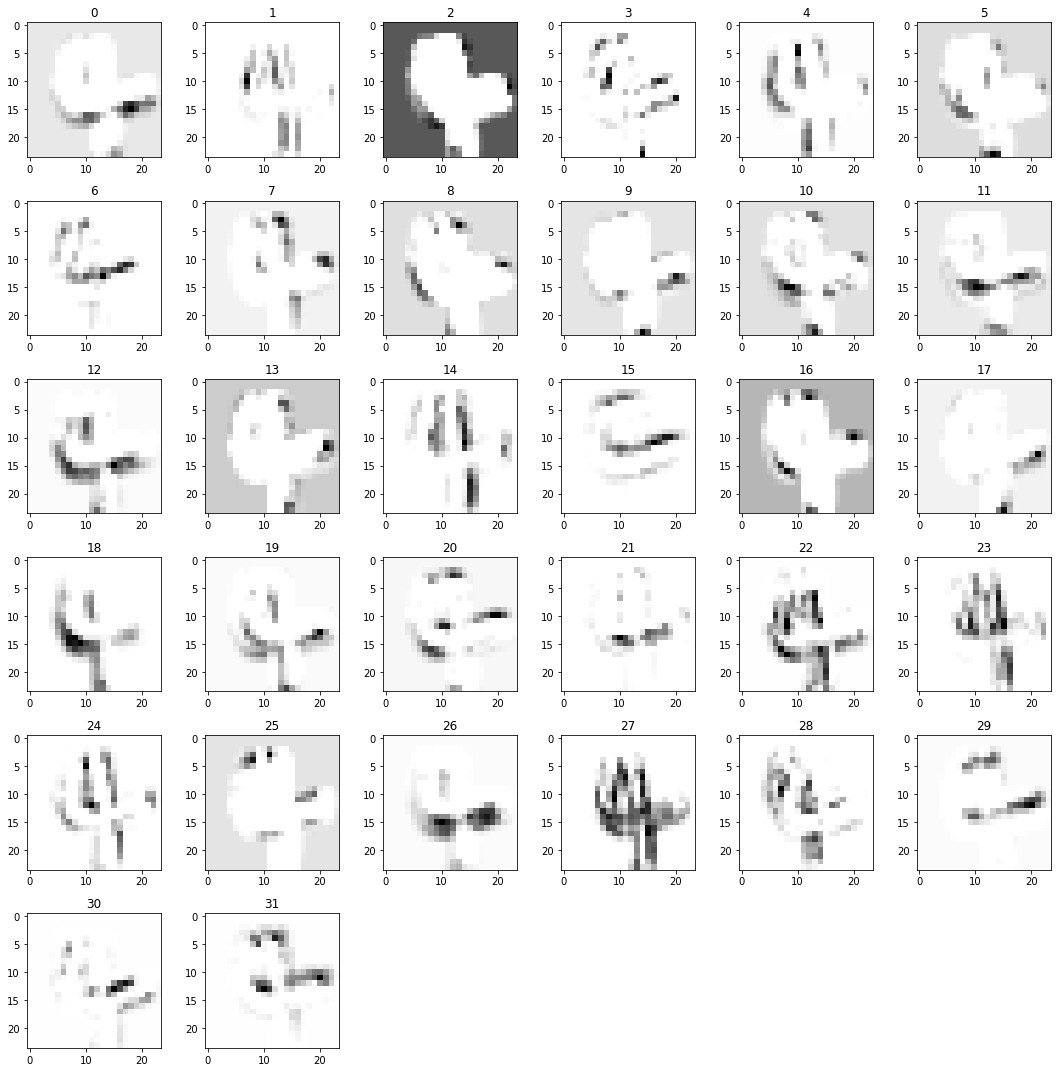

Visualizing layer #7 (conv2d_3)


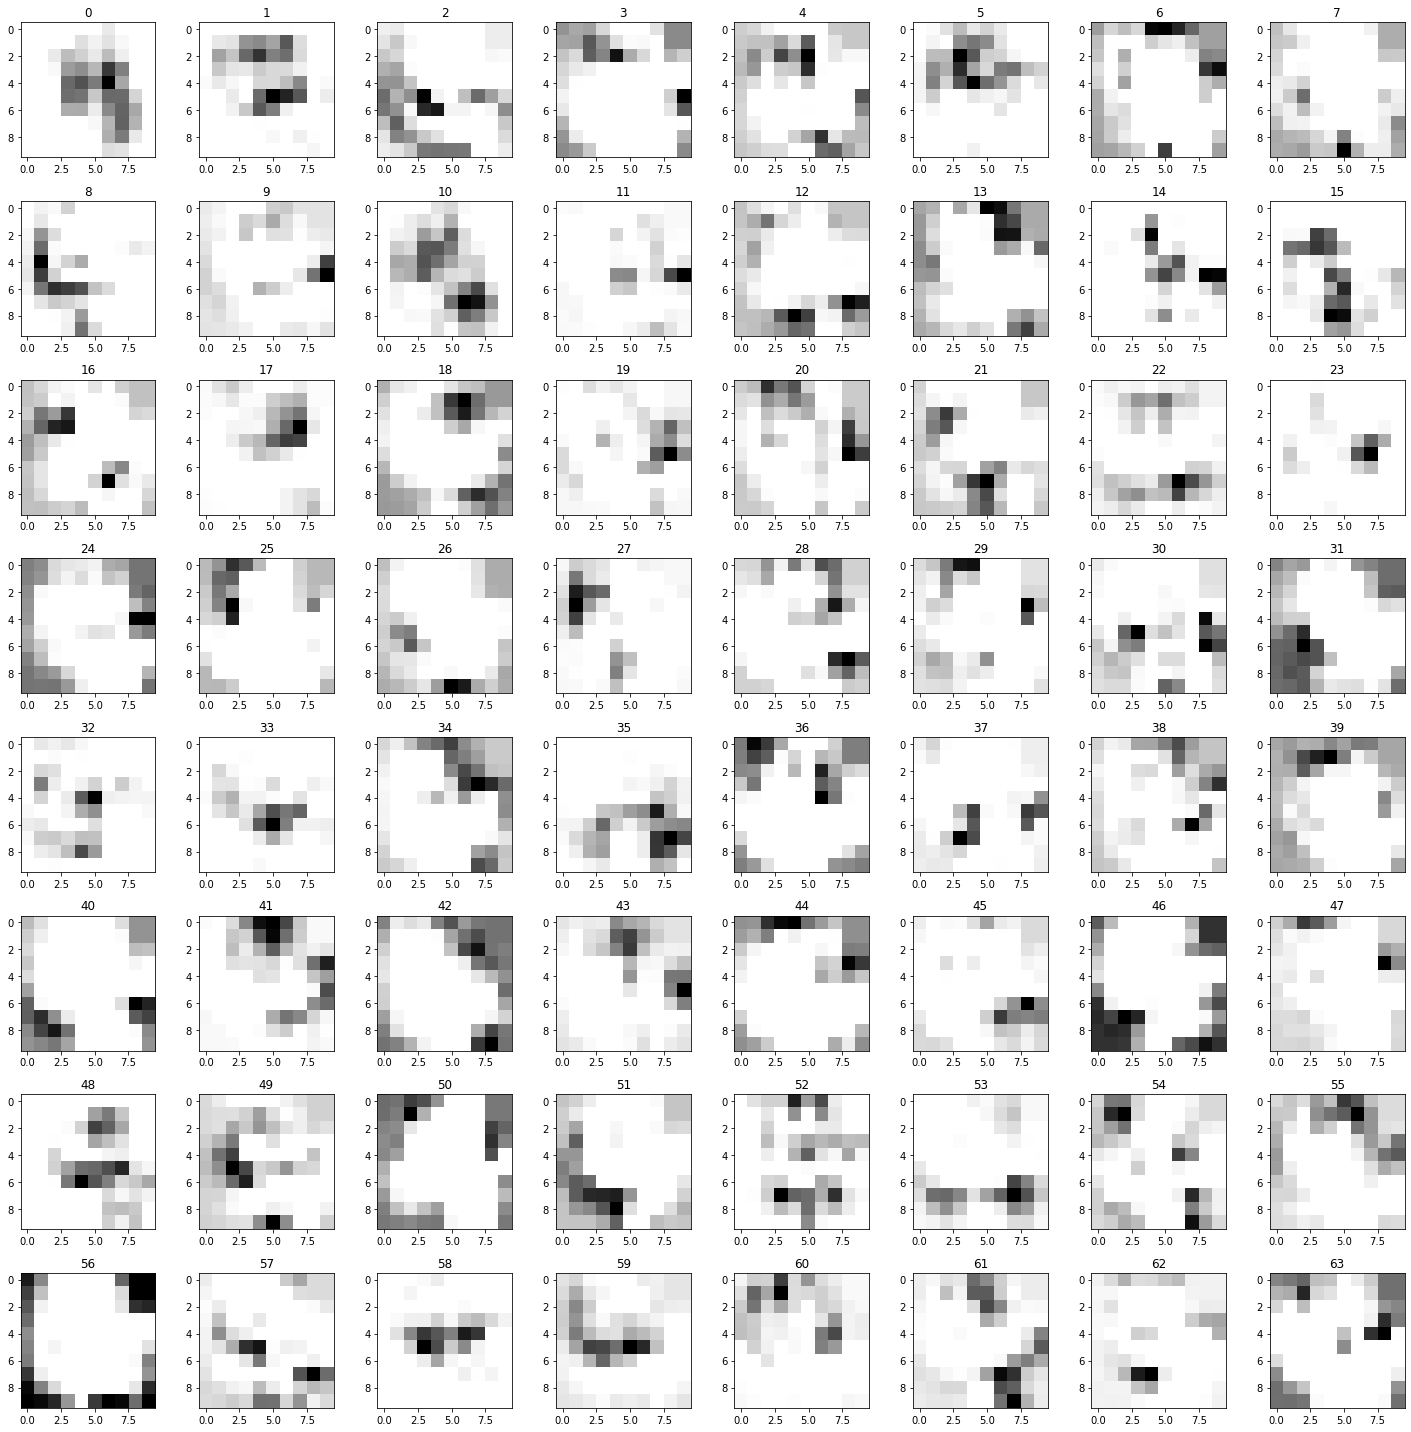

Visualizing layer #9 (conv2d_4)


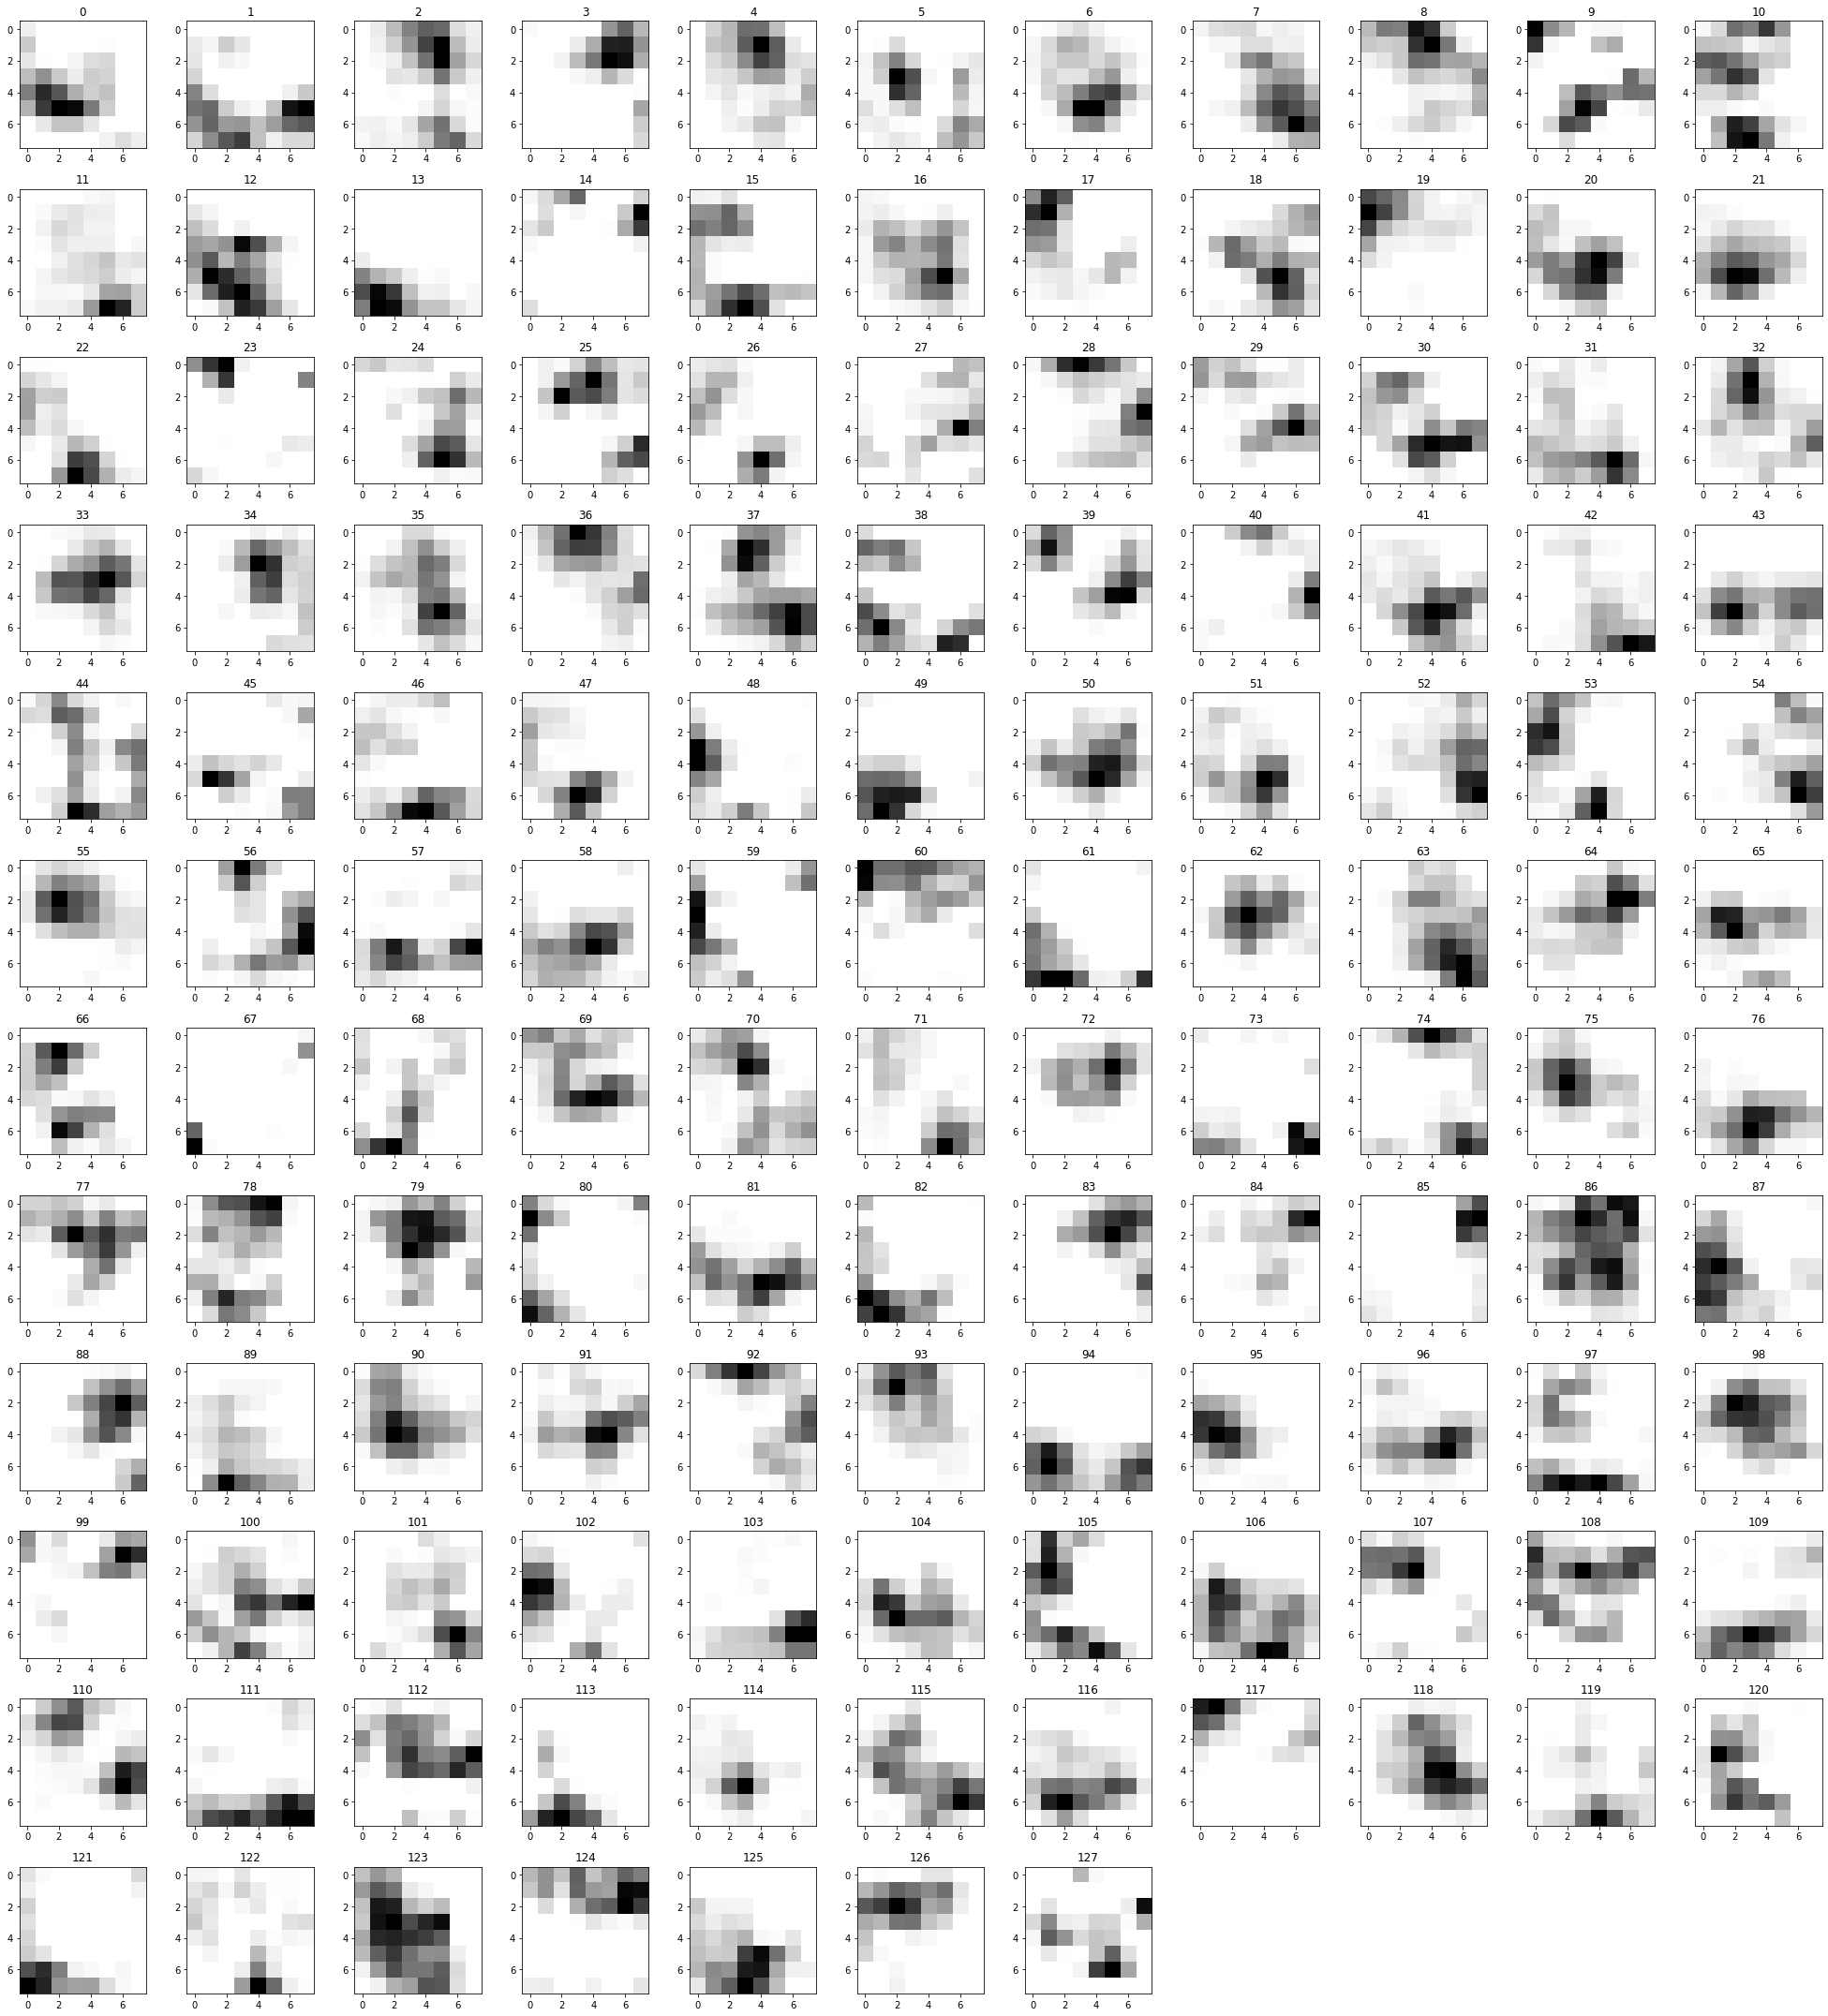

In [24]:
index = random.choice(range(len(mnist_x_test)))
print("Visualizing test image", index)
image = mnist_x_test[index]
show_images([image], cmap="gray")

def nn_get_submodel(model, layer):
  return models.Model(model.input, model.layers[layer].output)

def nn_visualize_layer_activations(model, layer, input):
  submodel = nn_get_submodel(model, layer)
  activations = submodel.predict(np.expand_dims(input, 0))[0]
  activation_channels = np.arange(activations.shape[-1])
  activation_images = [activations[:,:,i] for i in activation_channels]
  show_images(activation_images, activation_channels, cmap="Greys", scaling=(2.5, 2.5), normalize=True)

for i_layer, layer in enumerate(plainmnist_model.layers):
  if layer.name.startswith("conv2d") and len(layer.output.shape) == 4:
    print("Visualizing layer #%d (%s)" % (i_layer, layer.name))
    nn_visualize_layer_activations(plainmnist_model, i_layer, image)

### Evaluating the model

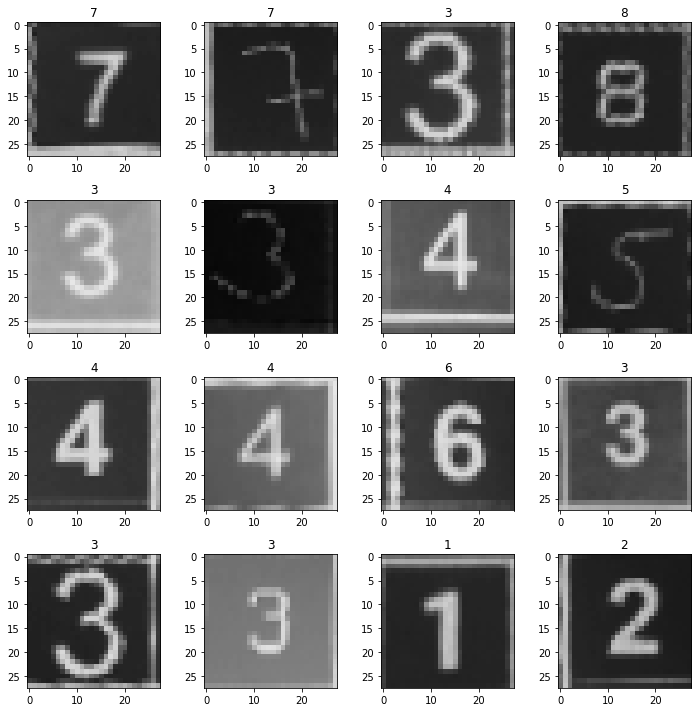

In [107]:
import cv2 as cv

def nn_mnist_preprocess(cell):
  # convert to grayscale
  cell = cv.cvtColor(cell, cv.COLOR_RGB2GRAY)
  # invert:
  cell = 255 - cell
  # resize:
  cell = cv.resize(cell, (28, 28), cv.INTER_AREA)
  # normalize:
  cell = cell.astype("float32") / 255.0
  # expand dims:
  cell = np.expand_dims(cell, axis=2)
  return cell

plainmnist_X_train = np.array([nn_mnist_preprocess(x) for x in train["image"][train["digit"] != 0]])
plainmnist_X_test = np.array([nn_mnist_preprocess(x) for x in test["image"][test["digit"] != 0]])
plainmnist_Y_train = train["digit"][train["digit"] != 0].values
plainmnist_Y_test = test["digit"][test["digit"] != 0].values
show_images(plainmnist_X_train, plainmnist_Y_train, cmap="gray", scaling=(2.5, 2.5), n_samples=16)

In [108]:
plainmnist_model.evaluate(plainmnist_X_test, plainmnist_Y_test)

1631/1631 [==============================] - 0s 75us/step


[8.150574292967029, 0.21704475772592788]

In [109]:
from sklearn.metrics import classification_report
plainmnist_Y_pred = plainmnist_model.predict(plainmnist_X_test)
print(classification_report(plainmnist_Y_test, np.argmax(plainmnist_Y_pred, axis=1)))

              precision    recall  f1-score   support

           1       0.25      1.00      0.39       210
           2       0.00      0.00      0.00       183
           3       1.00      0.01      0.01       155
           4       1.00      0.12      0.21       168
           5       0.00      0.00      0.00       175
           6       1.00      0.00      0.01       204
           7       0.00      0.00      0.00       181
           8       0.16      0.65      0.26       189
           9       0.00      0.00      0.00       166

    accuracy                           0.22      1631
   macro avg       0.38      0.20      0.10      1631
weighted avg       0.37      0.22      0.11      1631



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Augmented MNIST

### Acquire dataset

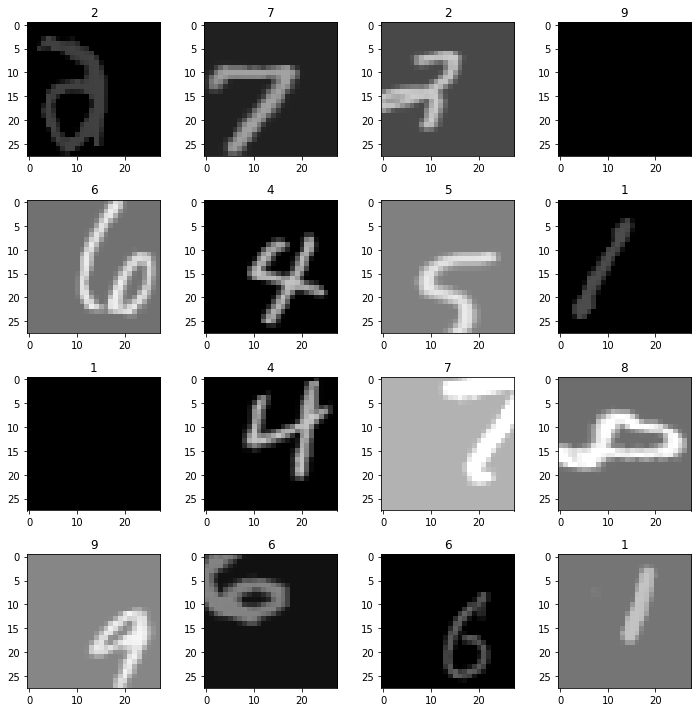

In [100]:
import PIL

def augmnist_change_brightness(image, factor):
  return image * factor

def augmnist_change_contrast(image, factor):
  return 0.5 + factor * (image - 0.5)

def augmnist_preprocess(image):
  image = image[:,:,0]
  factor = np.random.rand() * 0.5 + 0.5
  image = augmnist_change_brightness(image, factor)
  factor = np.random.rand() * 0.5 + 0.5
  image = augmnist_change_contrast(image, factor)
  image += np.random.randn() * 0.25
  image = np.clip(image, 0.0, 1.0)
  return np.expand_dims(image, axis=2)

from keras.preprocessing.image import ImageDataGenerator
generator = ImageDataGenerator(width_shift_range=0.25, height_shift_range=0.25, zoom_range=0.25, shear_range=22.5, preprocessing_function=augmnist_preprocess)
augmnist_generator_train = generator.flow(mnist_x_train, mnist_y_train)
augmnist_generator_test = generator.flow(mnist_x_test, mnist_y_test)
show_images(*augmnist_generator_train[0], cmap="gray", scaling=(2.5, 2.5), n_samples=16)

### Building the model

In [101]:
from keras import models, layers

augmnist_model = model_input = layers.Input(shape=(28, 28, 1))

augmnist_model = layers.Conv2D(16, 3, activation="relu")(augmnist_model)
augmnist_model = layers.BatchNormalization()(augmnist_model)
augmnist_model = layers.Conv2D(32, 3, activation="relu")(augmnist_model)
augmnist_model = layers.MaxPool2D()(augmnist_model)
augmnist_model = layers.BatchNormalization()(augmnist_model)
augmnist_model = layers.Dropout(0.25)(augmnist_model)

augmnist_model = layers.Conv2D(64, 3, activation="relu")(augmnist_model)
augmnist_model = layers.BatchNormalization()(augmnist_model)
augmnist_model = layers.Conv2D(128, 3, activation="relu")(augmnist_model)
augmnist_model = layers.GlobalMaxPool2D()(augmnist_model)
augmnist_model = layers.BatchNormalization()(augmnist_model)
augmnist_model = layers.Dropout(0.25)(augmnist_model)

#model = layers.Flatten()(model)
#model = layers.Dense(32, activation="relu")(model)
#model = layers.BatchNormalization()(model)
augmnist_model = layers.Dense(10, activation="softmax")(augmnist_model)
augmnist_model = models.Model(model_input, augmnist_model)
augmnist_model.compile("adam", "sparse_categorical_crossentropy", metrics=["acc"])
augmnist_model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_25 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_13 (Dropout)         (None, 12, 12, 32)        0  

### Fitting the model

In [102]:
from keras import callbacks
early_stopping = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
fit_history = augmnist_model.fit_generator(augmnist_generator_train, validation_data=augmnist_generator_test, epochs=100, callbacks=[early_stopping])

Epoch 1/100
1875/1875 [==============================] - 34s 18ms/step - loss: 0.6112 - acc: 0.8073 - val_loss: 0.2092 - val_acc: 0.9354
Epoch 2/100
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2664 - acc: 0.9189 - val_loss: 0.1519 - val_acc: 0.9530
Epoch 3/100
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2271 - acc: 0.9308 - val_loss: 0.1511 - val_acc: 0.9521
Epoch 4/100
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1950 - acc: 0.9408 - val_loss: 0.1327 - val_acc: 0.9574
Epoch 5/100
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1903 - acc: 0.9411 - val_loss: 0.1225 - val_acc: 0.9599
Epoch 6/100
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1746 - acc: 0.9466 - val_loss: 0.1083 - val_acc: 0.9641
Epoch 7/100
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1650 - acc: 0.9500 - val_loss: 0.1212 - val_acc: 0.9593
Epoch 8/100
1875/1875 [==================

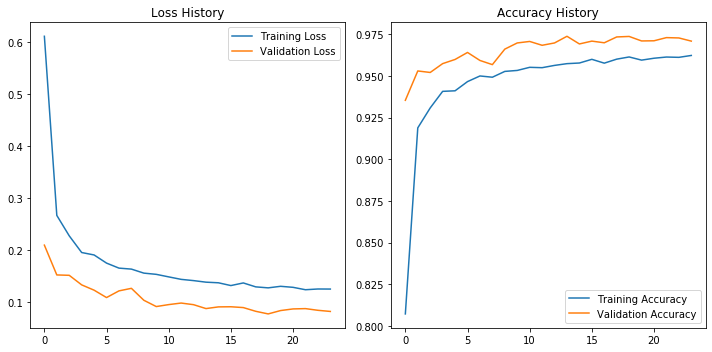

In [103]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Loss History")
plt.plot(fit_history.history["loss"], label="Training Loss")
plt.plot(fit_history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.title("Accuracy History")
plt.plot(fit_history.history["acc"], label="Training Accuracy")
plt.plot(fit_history.history["val_acc"], label="Validation Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

In [104]:
augmnist_model.evaluate_generator(augmnist_generator_test)

[0.07680220116972923, 0.9757]

### Evaluating the model

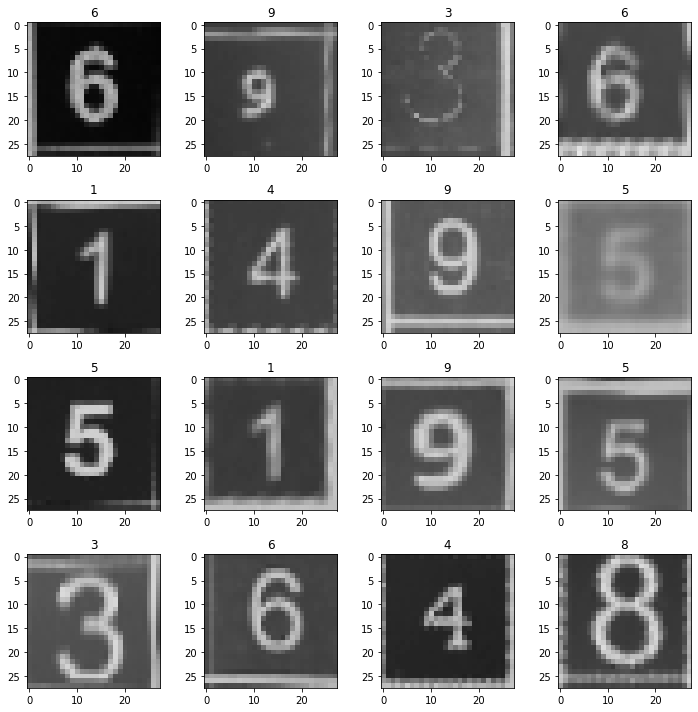

In [105]:
augmnist_X_train = np.array([nn_mnist_preprocess(x) for x in train["image"][train["digit"] != 0]])
augmnist_X_test = np.array([nn_mnist_preprocess(x) for x in test["image"][test["digit"] != 0]])
augmnist_Y_train = train["digit"][train["digit"] != 0].values
augmnist_Y_test = test["digit"][test["digit"] != 0].values
show_images(augmnist_X_test, augmnist_Y_test, cmap="gray", scaling=(2.5, 2.5), n_samples=16)

In [110]:
augmnist_model.evaluate(augmnist_X_test, augmnist_Y_test)

1631/1631 [==============================] - 0s 78us/step


[1.087258925765369, 0.6811771916144469]

In [111]:
from sklearn.metrics import classification_report
augmnist_Y_pred = augmnist_model.predict(augmnist_X_test)
print(classification_report(augmnist_Y_test, np.argmax(augmnist_Y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.99      0.48      0.64       210
           2       0.60      0.63      0.62       183
           3       0.52      0.97      0.68       155
           4       0.61      0.73      0.66       168
           5       0.88      0.82      0.85       175
           6       0.82      0.75      0.78       204
           7       0.77      0.59      0.67       181
           8       0.68      0.89      0.78       189
           9       0.67      0.30      0.41       166

    accuracy                           0.68      1631
   macro avg       0.66      0.62      0.61      1631
weighted avg       0.74      0.68      0.68      1631



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Sudoku dataset


### Acquire dataset

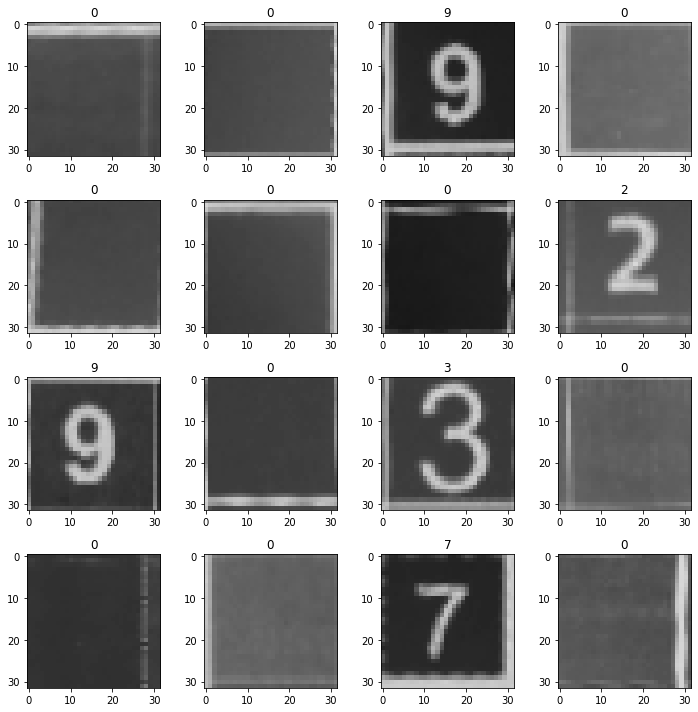

In [51]:
def sudnn_preprocess(cell):
  # convert to grayscale
  cell = cv.cvtColor(cell, cv.COLOR_RGB2GRAY)
  # invert:
  cell = 255 - cell
  # resize:
  cell = cv.resize(cell, (32, 32), cv.INTER_AREA)
  # normalize:
  cell = cell.astype("float32") / 255.0
  # expand dims:
  cell = np.expand_dims(cell, axis=2)
  return cell

sudnn_X_train = np.array([sudnn_preprocess(x) for x in train["image"]])
sudnn_X_test = np.array([sudnn_preprocess(x) for x in test["image"]])
sudnn_Y_train = train["digit"].values
sudnn_Y_test = test["digit"].values
show_images(sudnn_X_test, sudnn_Y_test, cmap="gray", scaling=(2.5, 2.5), n_samples=16)

### Building the model

In [52]:
from keras import models, layers

sudnn_model = model_input = layers.Input(shape=(32, 32, 1))

sudnn_model = layers.Conv2D(8, 3, activation="relu")(sudnn_model)
sudnn_model = layers.BatchNormalization()(sudnn_model)
sudnn_model = layers.Conv2D(16, 3, activation="relu")(sudnn_model)
sudnn_model = layers.MaxPool2D()(sudnn_model)
sudnn_model = layers.BatchNormalization()(sudnn_model)
sudnn_model = layers.Dropout(0.25)(sudnn_model)

sudnn_model = layers.Conv2D(16, 3, activation="relu")(sudnn_model)
sudnn_model = layers.BatchNormalization()(sudnn_model)
sudnn_model = layers.Conv2D(32, 3, activation="relu")(sudnn_model)
sudnn_model = layers.GlobalMaxPool2D()(sudnn_model)
sudnn_model = layers.BatchNormalization()(sudnn_model)
sudnn_model = layers.Dropout(0.25)(sudnn_model)

#model = layers.Flatten()(model)
#model = layers.Dense(32, activation="relu")(model)
#model = layers.BatchNormalization()(model)
sudnn_model = layers.Dense(10, activation="softmax")(sudnn_model)
sudnn_model = models.Model(model_input, sudnn_model)
sudnn_model.compile("adam", "sparse_categorical_crossentropy", metrics=["acc"])
sudnn_model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 8)         80        
_________________________________________________________________
batch_normalization_9 (Batch (None, 30, 30, 8)         32        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 16)        1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 14, 14, 16)        64        
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 16)        0   

### Fitting the model

In [54]:
from sklearn.utils.class_weight import compute_class_weight
class_weight = compute_class_weight("balanced", np.unique(sudnn_Y_train), sudnn_Y_train)
class_weight

array([0.21992428, 1.64787234, 1.6655914 , 1.52610837, 1.73719626,
       1.69289617, 1.58871795, 1.71792976, 1.69289617, 1.60795848])

In [55]:
from keras import callbacks
early_stopping = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
fit_history = sudnn_model.fit(sudnn_X_train, sudnn_Y_train, 
                              validation_data=(sudnn_X_test, sudnn_Y_test), 
                              epochs=100, callbacks=[early_stopping], 
                              class_weight=class_weight)

Train on 9294 samples, validate on 3099 samples
Epoch 1/100
9294/9294 [==============================] - 4s 433us/step - loss: 1.0962 - acc: 0.6440 - val_loss: 0.4774 - val_acc: 0.8700
Epoch 2/100
9294/9294 [==============================] - 3s 275us/step - loss: 0.4648 - acc: 0.8638 - val_loss: 0.2249 - val_acc: 0.9335
Epoch 3/100
9294/9294 [==============================] - 3s 288us/step - loss: 0.2919 - acc: 0.9155 - val_loss: 0.1443 - val_acc: 0.9597
Epoch 4/100
9294/9294 [==============================] - 3s 275us/step - loss: 0.2161 - acc: 0.9380 - val_loss: 0.1241 - val_acc: 0.9610
Epoch 5/100
9294/9294 [==============================] - 3s 279us/step - loss: 0.1745 - acc: 0.9477 - val_loss: 0.1243 - val_acc: 0.9610
Epoch 6/100
9294/9294 [==============================] - 3s 283us/step - loss: 0.1432 - acc: 0.9562 - val_loss: 0.0904 - val_acc: 0.9745
Epoch 7/100
9294/9294 [==============================] - 3s 277us/step - loss: 0.1195 - acc: 0.9631 - val_loss: 0.0731 - val_acc: 

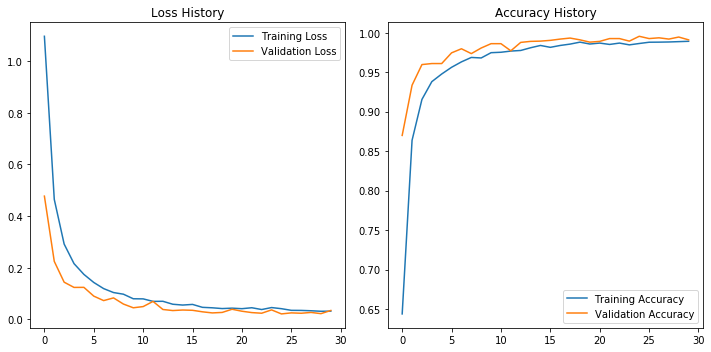

In [58]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Loss History")
plt.plot(fit_history.history["loss"], label="Training Loss")
plt.plot(fit_history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.title("Accuracy History")
plt.plot(fit_history.history["acc"], label="Training Accuracy")
plt.plot(fit_history.history["val_acc"], label="Validation Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

In [59]:
sudnn_model.evaluate(sudnn_X_test, sudnn_Y_test)

3099/3099 [==============================] - 0s 71us/step


[0.021514119408188058, 0.9954824136818329]

### Evaluating the model

In [60]:
sudnn_model.evaluate(sudnn_X_test, sudnn_Y_test)

3099/3099 [==============================] - 0s 66us/step


[0.021514119408188058, 0.9954824136818329]

In [61]:
sudnn_Y_pred = sudnn_model.predict(sudnn_X_test)
print(classification_report(sudnn_Y_test, np.argmax(sudnn_Y_pred, axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1468
           1       0.98      1.00      0.99       210
           2       0.99      0.99      0.99       183
           3       1.00      0.99      1.00       155
           4       0.99      0.98      0.99       168
           5       0.99      0.99      0.99       175
           6       1.00      0.99      0.99       204
           7       0.99      1.00      0.99       181
           8       0.98      0.99      0.98       189
           9       1.00      0.99      0.99       166

    accuracy                           1.00      3099
   macro avg       0.99      0.99      0.99      3099
weighted avg       1.00      1.00      1.00      3099



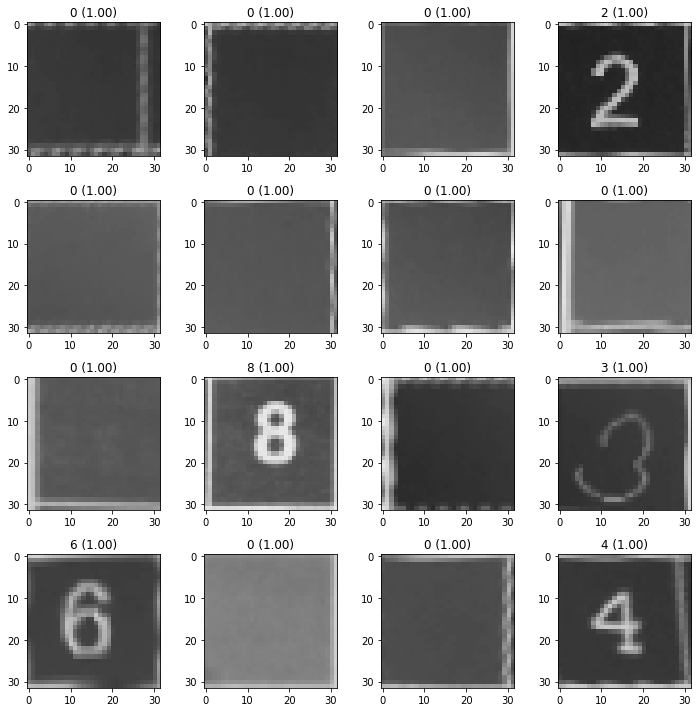

In [62]:
show_images(sudnn_X_test, ["%d (%0.2f)" % (np.argmax(pred), np.max(pred)) for pred in sudnn_Y_pred], cmap="gray", scaling=(2.5, 2.5), n_samples=16)